In [98]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import FeatureUnion

from skits.feature_extraction import AutoregressiveTransformer
from skits.pipeline import ForecasterPipeline
from skits.preprocessing import ReversibleImputer
from skits.preprocessing import HorizonTransformer
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
import numpy as np
import seaborn as sns
import pandas as pd

In [115]:
x = np.arange(1200)

y = np.array([np.sin(x)+0.1*x for x in range(1200)])

pipe = ForecasterPipeline([
    ('pre_horizon', HorizonTransformer(horizon=12)),
    ('pre_reversible_imputer', ReversibleImputer(y_only=True)),
    ('features', FeatureUnion([('ar_features', AutoregressiveTransformer(num_lags=120)),])),
    ('post_feature_imputer', ReversibleImputer()),
    ('regressor', MultiOutputRegressor(XGBRegressor(n_estimators=64)))
])

In [116]:
lin_model = LinearRegression()
lin_model.fit(x.reshape(-1,1), y)
trend = lin_model.predict(x.reshape(-1,1))
detrended = [y[i] - trend[i] for i in range(y.shape[0])]

y_transformed = np.nan_to_num(np.array(detrended))
X = y_transformed.reshape(-1,1).copy()

In [117]:
test_shape = 20
train_shape = x.shape[0] - test_shape
pipe = pipe.fit(X, y)

/home/amckann/.conda/envs/django_env/lib/python3.9/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [118]:
#sns.lineplot(X.flatten(), np.arange(X.shape[0]))
pred = pipe.predict(X, start_idx=0)

In [119]:
pred.flatten()

array([ 9.201445,  9.777989,  9.375384, ..., 61.670708, 62.288944,
       59.64326 ], dtype=float32)

In [168]:
df = pd.DataFrame({
    'actual': y_transformed[1100:1120],
    'predicted': pred.flatten()[1100:1120]
})

[]

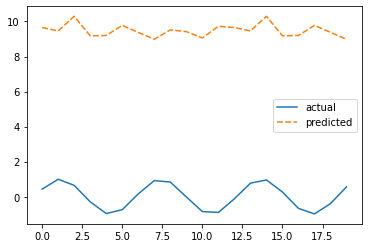

In [169]:
sns.lineplot(data=df).plot()